# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Rhamdan Syahrul Mubarak
- **Email:** rhamss794@mail.ugm.ac.id
- **ID Dicoding:** rhamdansyahrul

## Menentukan Pertanyaan Bisnis

1. bagaimana perbandingan tingkat kondisi masing-masing partikel polusi di setiap kota ?

2. Pada saat apa saja konsentrasi partikel polutan (PM2.5, PM10, NO₂, dll.) cenderung mencapai puncaknya, dan bagaimana pola ini di berbagai lokasi ?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
dataset_path = '/data' # Folder that save dataset
city_list = [x.split("_")[2] for x in os.listdir(dataset_path) if x != '.ipynb_checkpoints'] # read a file and get a station name
city_list.sort()
print(city_list)

['20130301-20170228']


In [ ]:
# function that can be used to read CSV file to pandas DataFrame
def csv_to_df(dataset_path, city):
  file_name = f"data/PRSA_Data_{city}_20130301-20170228.csv"
  csv_file = os.path.join(dataset_path, file_name)
  df = pd.read_csv(csv_file)
  return df

sample = csv_to_df(dataset_path, city_list[0])
sample.head()

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

In [4]:
# Get the Information about column that used in each station dataset and comparing the field list.
def compare_columns(dataset_path, city_list):
  column_dict_list = {}

  for city in city_list:
    df = csv_to_df(dataset_path, city) # read csv file to pandas
    column_dict_list[city] = df.columns.to_list() # get columns list

  return column_dict_list

for key, value in compare_columns(dataset_path, city_list).items():
  print(f"{key} : {value}")
  print(len(value))

Aotizhongxin : ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
18
Changping : ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
18
Dingling : ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
18
Dongsi : ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
18
Guanyuan : ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
18
Gucheng : ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
18
Huairou : ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 

In [5]:
# Function to merge the field of year, month, day, and hour and convert to datetime format
def create_datetime_column(df):
  df["date"] = pd.to_datetime(df[["year", "month", "day", "hour"]]) # convert to datetime format
  df.drop(columns=["year", "month", "day", "hour"], inplace=True) # drop year, month, day, and hour column

  column_list = ["station", "date"] + df.columns.to_list()[:6] # re-arrange the column
  df = df[column_list]

  return df

# Concat the each station dataset become one dataframe
def concat_all_csv(dataset_path, city_list):
  df_list = []

  for city in city_list:
    df = csv_to_df(dataset_path, city).iloc[:, 1:] # read csv to pandas
    df_list.append(df)

  df_concat = pd.concat(df_list, ignore_index=True) # merge pandas dataframe and reset index
  df_concat = create_datetime_column(df_concat) # convert datetime
  df_concat = df_concat.sort_values(by=["station", "date"], ascending=True).reset_index(drop=True) # sort table by station and date

  return df_concat

df_all_city = concat_all_csv(dataset_path, city_list)
df_all_city.head()

station                date  PM2.5  PM10   SO2   NO2     CO    O3
0  Aotizhongxin 2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0
1  Aotizhongxin 2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0
2  Aotizhongxin 2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0
3  Aotizhongxin 2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0
4  Aotizhongxin 2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0

In [6]:
# Count the data freq of each station
df_all_city["station"].value_counts()

station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanshouxigong    35064
Wanliu           27566
Name: count, dtype: int64

In [7]:
# Get the information about start and end datetime for each station
pd.DataFrame({'max' : df_all_city.groupby("station")["date"].max(),
              'min' : df_all_city.groupby("station")["date"].min()})

max        min
station                                     
Aotizhongxin  2017-02-28 23:00:00 2013-03-01
Changping     2017-02-28 23:00:00 2013-03-01
Dingling      2017-02-28 23:00:00 2013-03-01
Dongsi        2017-02-28 23:00:00 2013-03-01
Guanyuan      2017-02-28 23:00:00 2013-03-01
Gucheng       2017-02-28 23:00:00 2013-03-01
Huairou       2017-02-28 23:00:00 2013-03-01
Nongzhanguan  2017-02-28 23:00:00 2013-03-01
Shunyi        2017-02-28 23:00:00 2013-03-01
Tiantan       2017-02-28 23:00:00 2013-03-01
Wanliu        2016-04-22 13:00:00 2013-03-01
Wanshouxigong 2017-02-28 23:00:00 2013-03-01

**Insight:**
- Setiap dataset pada masing-masing station memiliki jumlah baris data yang sama.
- Setiap dataset memiliki jumlah kolom yang sama dan juga penamaan kolom dan field yang sama, sehingga tidak ada keperluan untuk filter field yang akan digunakan saat merge dataset.
- datetime awal dan akhir pada setiap station memiliki nilai yang sama.

### Assesing Data

#### Outlier

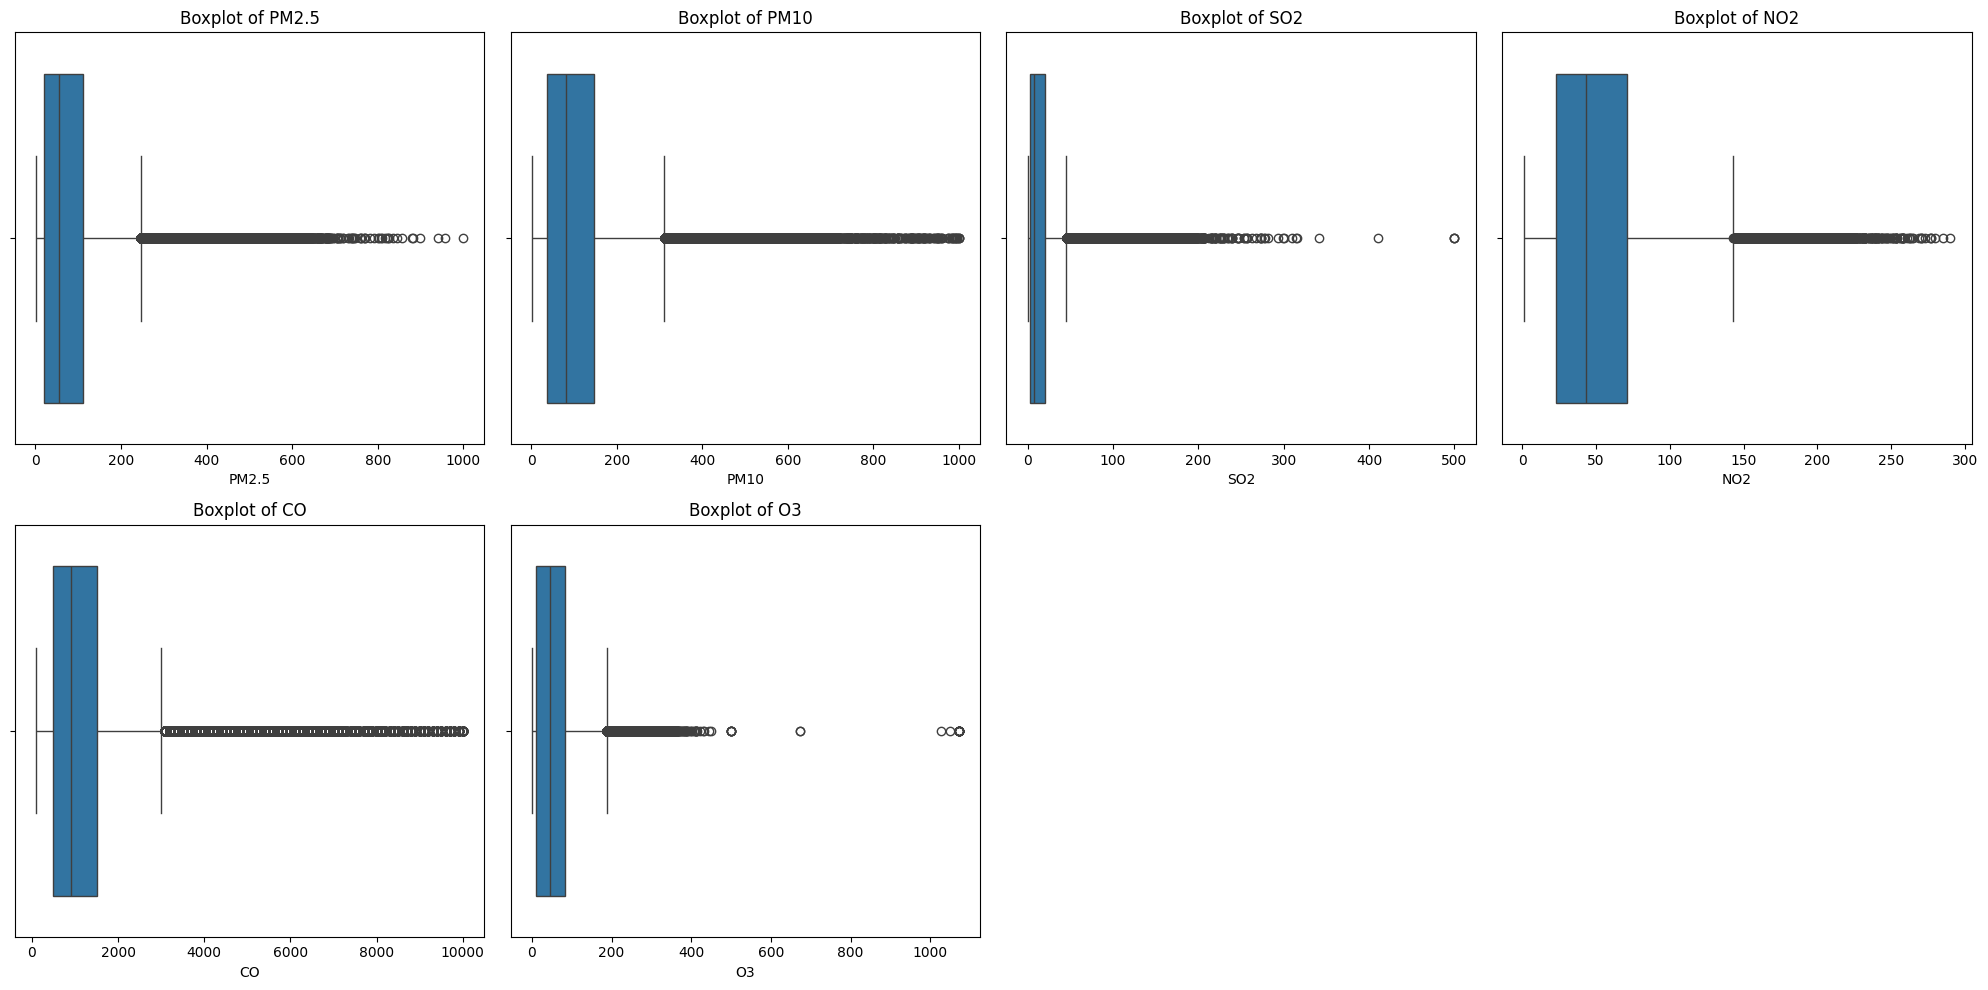

In [8]:
# Function to create a boxplot to know the outlier for each pollutant
def create_box_plot(df):
  # list of field that will be assed
  columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

  num_rows = (len(columns_to_plot) + 3) // 4  # Ceiling division to get enough rows

  # Setting the possition & size of chart
  fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))

  axes = axes.flatten()
  for i, column in enumerate(columns_to_plot):
      sns.boxplot(x=df[column], ax=axes[i]) # create a boxplot
      axes[i].set_title(f'Boxplot of {column}') # set title to know the pollutant

  for i in range(len(columns_to_plot), len(axes)):
      axes[i].set_visible(False) # off the visible of axes

  plt.tight_layout()
  plt.show()

create_box_plot(df_all_city)

#### Missing Value

In [9]:
# Function to know the total of rows that have missing value for each field
def calculate_missing_value(df, city_list, with_zero_missing):
  # get the percentage between rows that missing with total rows
  missing_percentage = (df.isnull().sum() / len(df)) * 100

  # get total missing value for each station
  missing_per_city ={}
  for city in city_list:
    missing_per_city[city] = df[df["station"] == city].isnull().sum()

  # total missing value for each pollutant
  missing_per_city['Total Missing'] = df.isnull().sum()
  missing_per_city['Percentage'] = round(missing_percentage, 2)

  missing_df = pd.DataFrame(missing_per_city) # create a dataframe

  # sort the table based on persentage start from the highest
  missing_df = missing_df.sort_values(by='Percentage', ascending=False)

  # condition to exclude the field that no have missing value
  if not with_zero_missing:
    missing_df = missing_df[missing_df["Percentage"] > 0]

  column_list = missing_df.index.to_list()
  return missing_df, column_list

In [10]:
total_missing_df, missing_column_list = calculate_missing_value(df_all_city, city_list, False)
total_missing_df

Aotizhongxin  Changping  Dingling  Dongsi  Guanyuan  Gucheng  Huairou  \
CO             1776       1521      2012    3197      1753     1401     1422   
O3             1719        604      1214     664      1173      729     1151   
NO2            1023        667      1234    1601       659      668     1639   
SO2             935        628       730     663       474      507      980   
PM2.5           925        774       779     750       616      646      953   
PM10            718        582       656     553       429      381      777   

       Nongzhanguan  Shunyi  Tiantan  Wanliu  Wanshouxigong  Total Missing  \
CO             1206    2178     1126    1717           1297          20606   
O3              506    1489      843    1928           1078          13098   
NO2             692    1365      744     987            754          12033   
SO2             446    1296     1118     500            669           8946   
PM2.5           628     913      677     296            696           8653   
PM10            440     548      597     213            484           6378   

       Percentage  
CO           4.99  
O3           3.17  
NO2          2.91  
SO2          2.16  
PM2.5        2.09  
PM10         1.54

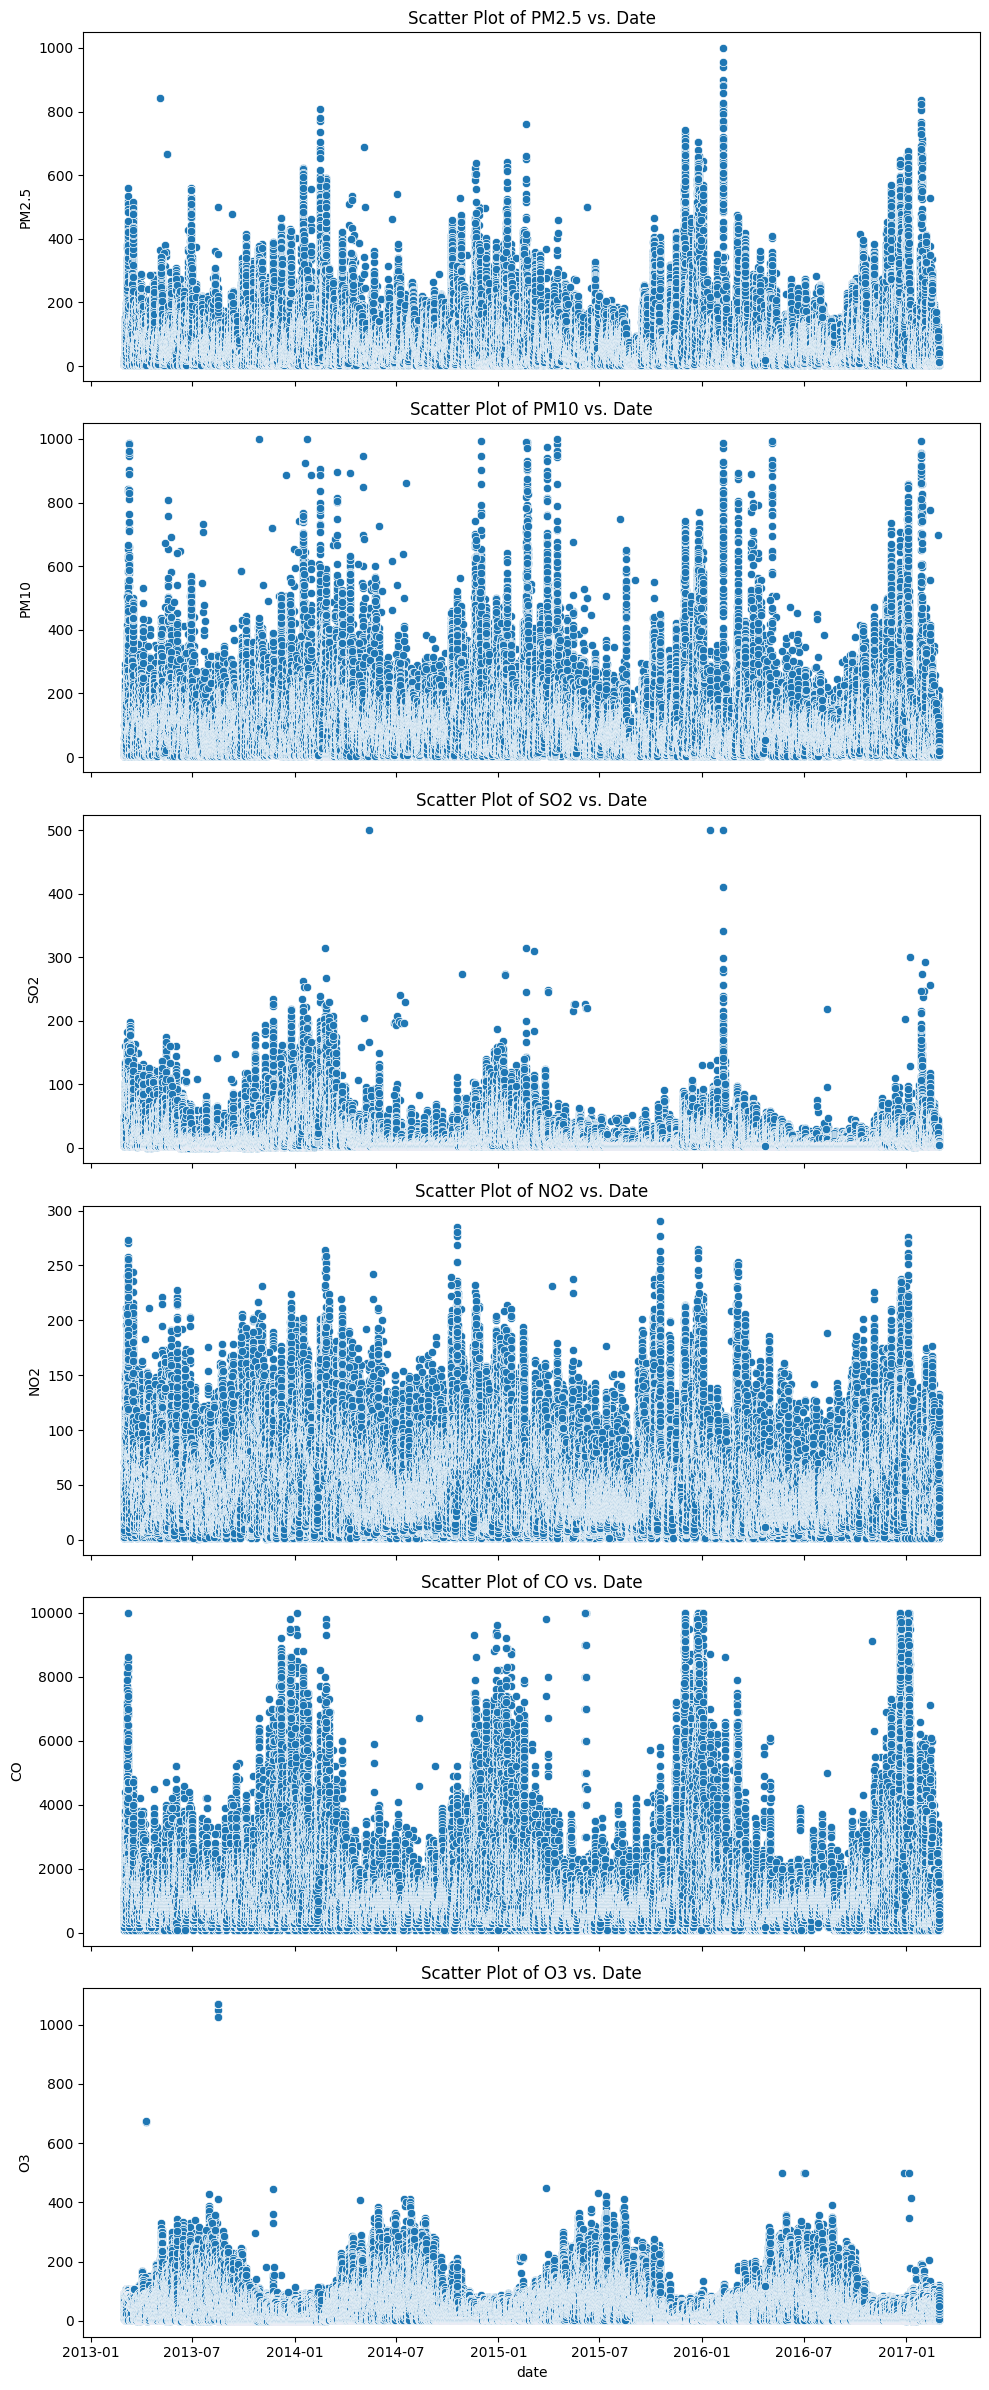

In [11]:
# Create a chart to get information of the scatter for each polutant
# this chart can be used to decide the methods will be used to handle missing value using interpolate

columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

fig, axes = plt.subplots(len(columns_to_plot), 1, figsize=(10, 4 * len(columns_to_plot)), sharex=True)

for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x='date', y=column, data=df_all_city, ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {column} vs. Date')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()

**Insight:**
- Terdapat beberapa data outlier yang melewati maksimal nilai interquartile, sehingga perlu dihandle.
- terdapat cukup banyak data yang menjadi missing value, sehingga perlu dihandle dengan cara melakukan imputasi data dan tidak menggunakan drop missing value karena akan membuat banyak kehilangan informasi.
- Terlihat terdapat pola pada semua field gas polusi, sehingga penggunaan interpolasi dengan metode "time" dapat menjadi pilihan yang lebih tepat untuk dilakukan.

### Cleaning Data

#### Handle Outlier

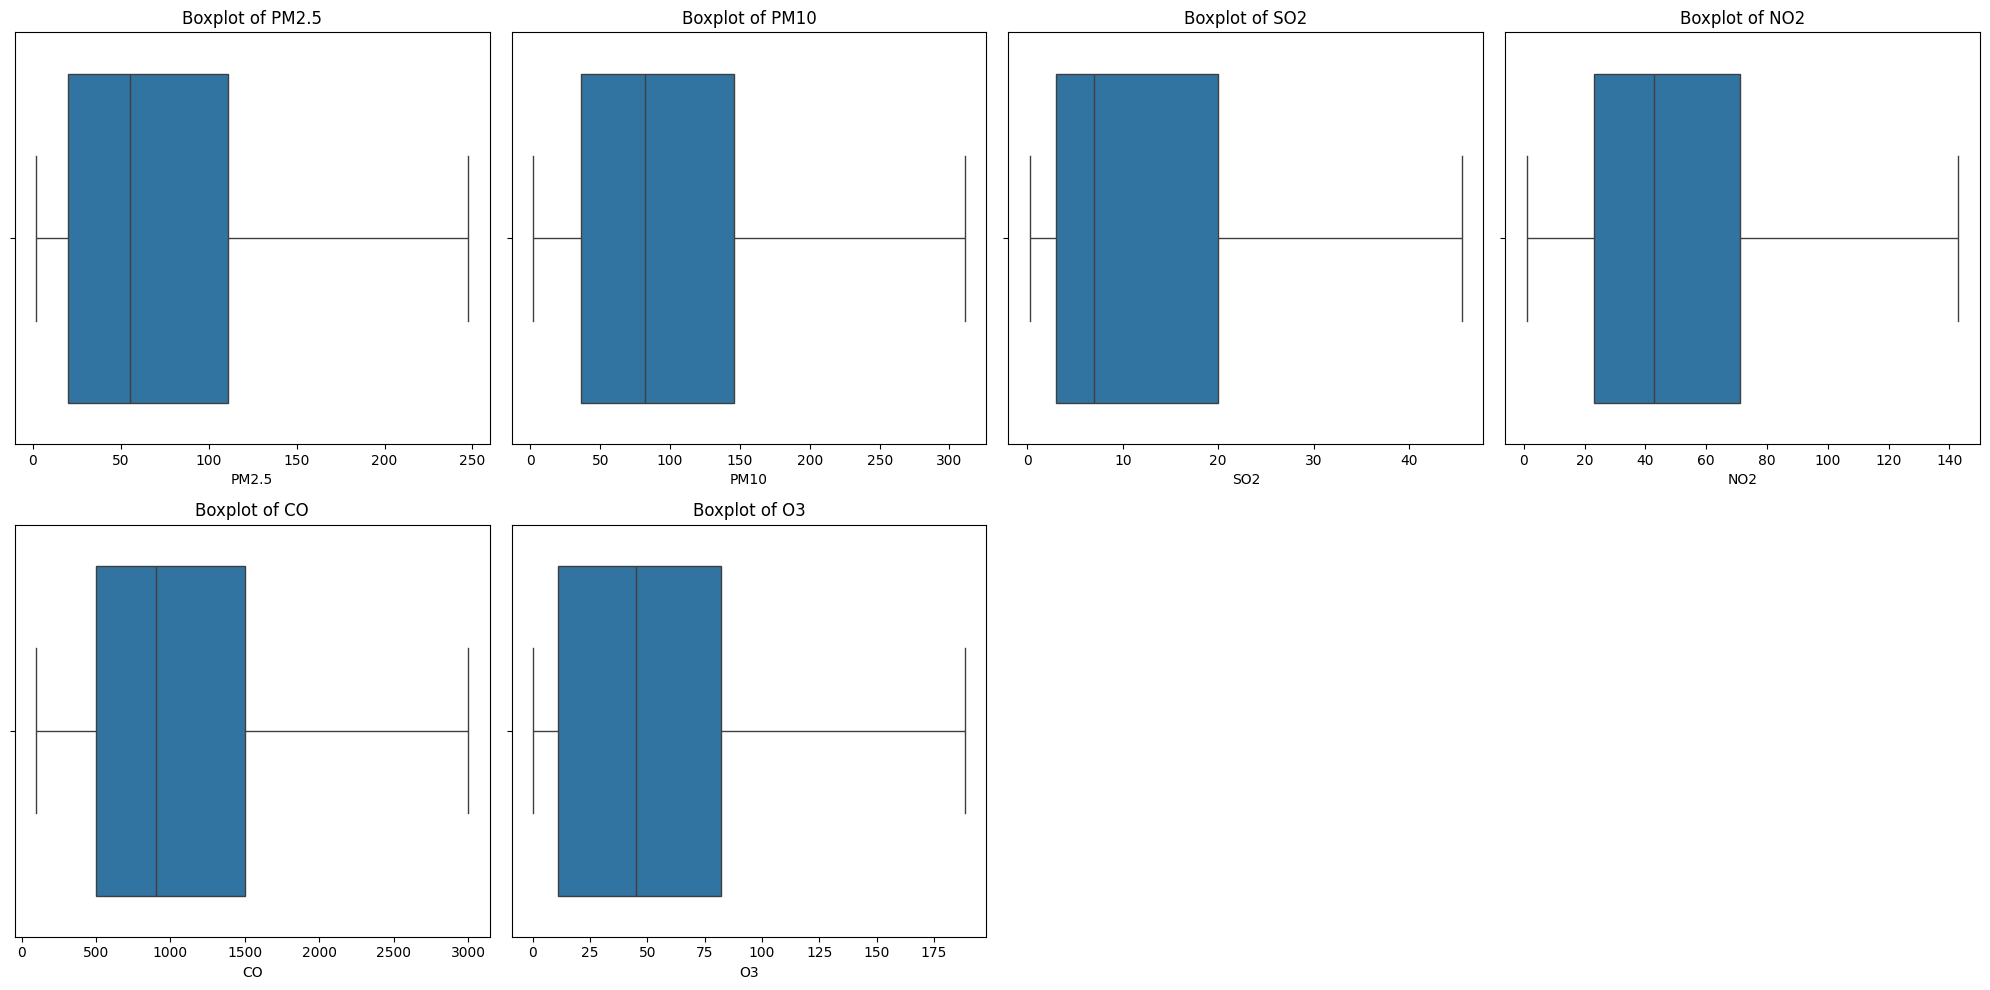

In [12]:
# Function to handle outlier using interquartile imputation
def imputation_outlier(df):
  columns_to_plot = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

  for column in columns_to_plot:
      Q1 = df[column].quantile(0.25) # get minimum quartile value
      Q3 = df[column].quantile(0.75) # get maximum quartile value
      IQR = Q3 - Q1

      lower_bound = Q1 - 1.5 * IQR
      upper_bound = Q3 + 1.5 * IQR

      # Correct the conditions and replacement values
      df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
      df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

imputation_outlier(df_all_city)
create_box_plot(df_all_city)

#### Handle Missing Value

In [13]:
# Function to handle the missing value by using interpolate methods
def interpolate_missing_value(df, columns, method):
  df_list = []

  for city in city_list:
    df_city = df[df["station"] == city]

    if method == "time":
      df_city = df_city.set_index("date")
      for column in columns:
        df_city[column] = df_city[column].interpolate(method=method)
      df_city = df_city.reset_index()

    else:
      for column in columns:
        df_city[column] = df_city[column].interpolate(method=method)

    df_list.append(df_city)

  df = pd.concat(df_list, ignore_index=True)

  return df

In [14]:
# list of the field that will be handled for missing value
columns_interpolate_time = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Running the function to handle missing value
df_no_missing_val = interpolate_missing_value(df_all_city, columns_interpolate_time, "time")

In [15]:
# Make sure that all missing value already handle
total_missing_df, missing_column_list = calculate_missing_value(df_no_missing_val, city_list, False)
total_missing_df

Aotizhongxin  Changping  Dingling  Dongsi  Guanyuan  Gucheng  Huairou  \
NO2             0          0         2       0         0       20        0   

     Nongzhanguan  Shunyi  Tiantan  Wanliu  Wanshouxigong  Total Missing  \
NO2             0       0        0       0              0             22   

     Percentage  
NO2        0.01

In [16]:
df_no_missing_val[df_no_missing_val["NO2"].isnull()].head()

date   station  PM2.5  PM10  SO2  NO2     CO    O3
70128  2013-03-01 00:00:00  Dingling    4.0   4.0  3.0  NaN  200.0  82.0
70129  2013-03-01 01:00:00  Dingling    7.0   7.0  3.0  NaN  200.0  80.0
175320 2013-03-01 00:00:00   Gucheng    6.0  18.0  5.0  NaN  800.0  88.0
175321 2013-03-01 01:00:00   Gucheng    6.0  15.0  5.0  NaN  800.0  88.0
175322 2013-03-01 02:00:00   Gucheng    5.0  18.0  5.5  NaN  700.0  52.0

In [17]:
# Drop the missing value because the missing value appear at the first of the datetime
df_no_missing_val = df_no_missing_val.dropna(subset="NO2")
total_missing_df, missing_column_list = calculate_missing_value(df_no_missing_val, city_list, False)
total_missing_df

Empty DataFrame
Columns: [Aotizhongxin, Changping, Dingling, Dongsi, Guanyuan, Gucheng, Huairou, Nongzhanguan, Shunyi, Tiantan, Wanliu, Wanshouxigong, Total Missing, Percentage]
Index: []

#### New Features

<html>
<body>
<table>
  <tr>
    <th>AQI</th>
    <th>Air Pollution Level</th>
    <th>Air Pollution Category</th>
  </tr>
  <tr>
    <td>0-50</td>
    <td>Level 1</td>
    <td>Excelent</td>
  </tr>
  <tr>
    <td>51-100</td>
    <td>Level 2</td>
    <td>Good</td>
  </tr>
  <tr>
    <td>101-150</td>
    <td>Level 3</td>
    <td>Lightly Polluted</td>
  </tr>
  <tr>
    <td>151-200</td>
    <td>Level 4</td>
    <td>Moderately Polluted</td>
  </tr>
  <tr>
    <td>201-300</td>
    <td>Level 5</td>
    <td>Heavily Polluted</td>
  </tr>
  <tr>
    <td>301-500</td>
    <td>Level 6</td>
    <td>Severely Polluted</td>
  </tr>
</table>
</body>
</html>



In [18]:
def get_aqi(df_old):
  df = df_old.copy()
  column_list = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

  cutoff = [0, 50, 100, 150, 200, 300, float("inf")]
  mark = ["Excelent", "Good", "Lightly Polluted", "Moderately Polluted", "Heavily Polluted", "Severely Polluted"]

  for column in column_list:
    df[f"class_{column}"] = pd.cut(df[column], bins=cutoff, labels=mark)
  return df

df_with_aqi = get_aqi(df_no_missing_val)
df_with_aqi

date        station  PM2.5  PM10   SO2   NO2     CO  \
0      2013-03-01 00:00:00   Aotizhongxin    4.0   4.0   4.0   7.0  300.0   
1      2013-03-01 01:00:00   Aotizhongxin    8.0   8.0   4.0   7.0  300.0   
2      2013-03-01 02:00:00   Aotizhongxin    7.0   7.0   5.0  10.0  300.0   
3      2013-03-01 03:00:00   Aotizhongxin    6.0   6.0  11.0  11.0  300.0   
4      2013-03-01 04:00:00   Aotizhongxin    3.0   3.0  12.0  12.0  300.0   
...                    ...            ...    ...   ...   ...   ...    ...   
413265 2017-02-28 19:00:00  Wanshouxigong   11.0  32.0   3.0  24.0  400.0   
413266 2017-02-28 20:00:00  Wanshouxigong   13.0  32.0   3.0  41.0  500.0   
413267 2017-02-28 21:00:00  Wanshouxigong   14.0  28.0   4.0  38.0  500.0   
413268 2017-02-28 22:00:00  Wanshouxigong   12.0  23.0   4.0  30.0  400.0   
413269 2017-02-28 23:00:00  Wanshouxigong   13.0  19.0   4.0  38.0  600.0   

          O3 class_PM2.5 class_PM10 class_SO2 class_NO2           class_CO  \
0       77.0    Excelent   Excelent  Excelent  Excelent   Heavily Polluted   
1       77.0    Excelent   Excelent  Excelent  Excelent   Heavily Polluted   
2       73.0    Excelent   Excelent  Excelent  Excelent   Heavily Polluted   
3       72.0    Excelent   Excelent  Excelent  Excelent   Heavily Polluted   
4       72.0    Excelent   Excelent  Excelent  Excelent   Heavily Polluted   
...      ...         ...        ...       ...       ...                ...   
413265  72.0    Excelent   Excelent  Excelent  Excelent  Severely Polluted   
413266  50.0    Excelent   Excelent  Excelent  Excelent  Severely Polluted   
413267  54.0    Excelent   Excelent  Excelent  Excelent  Severely Polluted   
413268  59.0    Excelent   Excelent  Excelent  Excelent  Severely Polluted   
413269  49.0    Excelent   Excelent  Excelent  Excelent  Severely Polluted   

        class_O3  
0           Good  
1           Good  
2           Good  
3           Good  
4           Good  
...          ...  
413265      Good  
413266  Excelent  
413267      Good  
413268      Good  
413269  Excelent  

[413248 rows x 14 columns]

**Insight:**
- Setiap field gas polusi dilakukan imputasi outlier dengan nilai maksimal dan minimal interquartile.
- melakukan handle missing value dengan mentode interpolasi, namun masih terdapat beberapa missing value di 2 station. kedua missing value tersebut terjadi di awal awal dataset, sehingga dilakukan handle dengan menggunakan drop missing value karena hanya terdapat sedikit data sehingga informasi yang hilang tidak akan terlalu berpengaruh.

## Exploratory Data Analysis (EDA)

### Explore

In [19]:
# Get the statistic description for each field
df_with_aqi.describe(include="all")

date       station          PM2.5  \
count                          413248        413248  413248.000000   
unique                            NaN            12            NaN   
top                               NaN  Aotizhongxin            NaN   
freq                              NaN         35064            NaN   
mean    2015-02-19 02:21:11.387642624           NaN      76.073799   
min               2013-03-01 00:00:00           NaN       2.000000   
25%               2014-02-22 19:00:00           NaN      20.000000   
50%               2015-02-16 12:00:00           NaN      55.000000   
75%               2016-02-10 05:00:00           NaN     111.000000   
max               2017-02-28 23:00:00           NaN     247.500000   
std                               NaN           NaN      68.184623   

                 PM10            SO2            NO2             CO  \
count   413248.000000  413248.000000  413248.000000  413248.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean       101.711620      13.600084      50.032478    1130.379103   
min          2.000000       0.285600       1.026500     100.000000   
25%         36.000000       3.000000      23.000000     500.000000   
50%         82.000000       7.000000      43.000000     900.000000   
75%        146.000000      20.000000      71.000000    1500.000000   
max        311.000000      45.500000     143.000000    3000.000000   
std         80.389713      14.074460      33.819274     816.412824   

                   O3 class_PM2.5 class_PM10 class_SO2 class_NO2  \
count   413248.000000      413248     413248    413248    413248   
unique            NaN           5          6         1         3   
top               NaN    Excelent   Excelent  Excelent  Excelent   
freq              NaN      195262     139444    413248    238239   
mean        55.525965         NaN        NaN       NaN       NaN   
min          0.214200         NaN        NaN       NaN       NaN   
25%         10.924200         NaN        NaN       NaN       NaN   
50%         44.500000         NaN        NaN       NaN       NaN   
75%         82.000000         NaN        NaN       NaN       NaN   
max        188.500000         NaN        NaN       NaN       NaN   
std         51.382073         NaN        NaN       NaN       NaN   

                 class_CO  class_O3  
count              413248    413248  
unique                  5         4  
top     Severely Polluted  Excelent  
freq               356514    224626  
mean                  NaN       NaN  
min                   NaN       NaN  
25%                   NaN       NaN  
50%                   NaN       NaN  
75%                   NaN       NaN  
max                   NaN       NaN  
std                   NaN       NaN

In [20]:
# Get the aggregate value for each pollution field in each city
df_with_aqi.groupby(by="station").agg({
    "PM2.5": ["max", "min", "mean", "std"],
    "PM10": ["max", "min", "mean", "std"],
    "SO2": ["max", "min", "mean", "std"],
    "NO2": ["max", "min", "mean", "std"],
    "CO": ["max", "min", "mean", "std"],
    "O3": ["max", "min", "mean", "std"],
})

PM2.5                              PM10                   \
                 max  min       mean        std    max  min        mean   
station                                                                   
Aotizhongxin   247.5  3.0  78.472426  68.634600  311.0  2.0  106.484374   
Changping      247.5  2.0  68.797640  64.676624  311.0  2.0   92.592320   
Dingling       247.5  3.0  64.395096  64.711104  311.0  2.0   82.415229   
Dongsi         247.5  3.0  81.291496  70.761999  311.0  2.0  105.836942   
Guanyuan       247.5  2.0  78.953337  67.969377  311.0  2.0  105.862507   
Gucheng        247.5  2.0  79.762673  68.386889  311.0  2.0  115.165421   
Huairou        247.5  2.0  67.462782  63.540305  311.0  2.0   90.374786   
Nongzhanguan   247.5  2.0  79.990670  70.661516  311.0  2.0  105.306806   
Shunyi         247.5  2.0  75.563045  68.444288  311.0  2.0   96.230169   
Tiantan        247.5  3.0  78.222728  68.302878  311.0  2.0  103.175880   
Wanliu         247.5  3.0  80.915497  69.368928  311.0  2.0  111.242337   
Wanshouxigong  247.5  3.0  80.094969  69.823241  311.0  2.0  107.897265   

                           SO2          ...        NO2                 CO  \
                     std   max     min  ...       mean        std     max   
station                                 ...                                 
Aotizhongxin   82.518737  45.5  0.2856  ...  58.390665  34.970930  3000.0   
Changping      74.874203  45.5  0.2856  ...  44.079648  29.002256  3000.0   
Dingling       72.775073  45.5  0.2856  ...  27.250021  26.023467  3000.0   
Dongsi         82.813594  45.5  0.2856  ...  53.570676  33.013549  3000.0   
Guanyuan       79.963352  45.5  1.0000  ...  57.535387  33.415431  3000.0   
Gucheng        83.501595  45.5  0.2856  ...  55.338016  34.950624  3000.0   
Huairou        76.389807  45.5  0.2856  ...  32.026211  26.021398  3000.0   
Nongzhanguan   82.420632  45.5  0.5712  ...  57.496354  34.604385  3000.0   
Shunyi         79.167165  45.5  0.2856  ...  43.968184  30.428599  3000.0   
Tiantan        78.042304  45.5  0.5712  ...  52.956006  30.970402  3000.0   
Wanliu         82.984934  45.5  0.2856  ...  66.269871  35.622107  3000.0   
Wanshouxigong  82.805092  45.5  0.2856  ...  54.982586  34.290168  3000.0   

                                                  O3                     \
                 min         mean         std    max     min       mean   
station                                                                   
Aotizhongxin   100.0  1138.565338  829.667515  188.5  0.2142  53.698122   
Changping      100.0  1061.896047  789.895033  188.5  0.2142  56.377485   
Dingling       100.0   886.059766  733.834992  188.5  0.2142  67.323096   
Dongsi         100.0  1219.575006  818.762641  188.5  0.6426  56.119417   
Guanyuan       100.0  1153.093529  812.768061  188.5  0.2142  53.365898   
Gucheng        100.0  1213.601187  842.570690  188.5  0.2142  56.290190   
Huairou        100.0   979.327387  717.234154  188.5  0.2142  58.806611   
Nongzhanguan   100.0  1192.283867  840.998791  188.5  0.2142  56.591409   
Shunyi         100.0  1097.377738  824.768205  188.5  0.2142  52.764231   
Tiantan        100.0  1193.566279  825.120341  188.5  0.4284  54.156262   
Wanliu         100.0  1199.812087  836.821959  188.5  0.2142  43.943466   
Wanshouxigong  100.0  1244.271917  838.295240  188.5  0.2142  54.399734   

                          
                     std  
station                   
Aotizhongxin   52.367468  
Changping      49.148887  
Dingling       48.014041  
Dongsi         50.720088  
Guanyuan       52.891593  
Gucheng        52.219274  
Huairou        49.327263  
Nongzhanguan   52.974946  
Shunyi         49.994468  
Tiantan        53.342953  
Wanliu         49.464806  
Wanshouxigong  52.654747  

[12 rows x 24 columns]

In [21]:
# get the frequency of each pollution class for each station
pd.DataFrame({
    'PM2.5' : df_with_aqi.groupby(by=["station", "class_PM2.5"]).date.count(),
    'PM10' : df_with_aqi.groupby(by=["station", "class_PM10"]).date.count(),
    'SO2' : df_with_aqi.groupby(by=["station", "class_SO2"]).date.count(),
    'NO2' : df_with_aqi.groupby(by=["station", "class_NO2"]).date.count(),
    'CO' : df_with_aqi.groupby(by=["station", "class_CO"]).date.count(),
    'O3' : df_with_aqi.groupby(by=["station", "class_O3"]).date.count(),
    })

<ipython-input-21-89c9c7fdccfd>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'PM2.5' : df_with_aqi.groupby(by=["station", "class_PM2.5"]).date.count(),
<ipython-input-21-89c9c7fdccfd>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'PM10' : df_with_aqi.groupby(by=["station", "class_PM10"]).date.count(),
<ipython-input-21-89c9c7fdccfd>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'SO2' : df_with_aqi.groupby(by=["

PM2.5   PM10    SO2    NO2     CO     O3
station                                                                    
Aotizhongxin  Excelent             15984  11324  35064  16544      0  19813
              Good                  8731   8373      0  13779    228   9180
              Lightly Polluted      4736   6242      0   4741      4   3390
              Moderately Polluted   2570   4018      0      0   1298   2681
              Heavily Polluted      3043   3527      0      0   2643      0
...                                  ...    ...    ...    ...    ...    ...
Wanshouxigong Good                  8789   8367      0  12765    251   9214
              Lightly Polluted      4860   6812      0   4056      7   3351
              Moderately Polluted   2561   3970      0      0    872   2819
              Heavily Polluted      3270   3392      0      0   2381      0
              Severely Polluted        0   1737      0      0  31553      0

[72 rows x 6 columns]

In [22]:
# get the frequency of each pollution class per year
pd.DataFrame({
    'PM2.5' : df_with_aqi.groupby(by=[df_with_aqi["date"].dt.year, "class_PM2.5"]).date.count(),
    'PM10' : df_with_aqi.groupby(by=[df_with_aqi["date"].dt.year, "class_PM10"]).date.count(),
    'SO2' : df_with_aqi.groupby(by=[df_with_aqi["date"].dt.year, "class_SO2"]).date.count(),
    'NO2' : df_with_aqi.groupby(by=[df_with_aqi["date"].dt.year, "class_NO2"]).date.count(),
    'CO' : df_with_aqi.groupby(by=[df_with_aqi["date"].dt.year, "class_CO"]).date.count(),
    'O3' : df_with_aqi.groupby(by=[df_with_aqi["date"].dt.year, "class_O3"]).date.count(),
    })

<ipython-input-22-dea21fbba236>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'PM2.5' : df_with_aqi.groupby(by=[df_with_aqi["date"].dt.year, "class_PM2.5"]).date.count(),
<ipython-input-22-dea21fbba236>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  'PM10' : df_with_aqi.groupby(by=[df_with_aqi["date"].dt.year, "class_PM10"]).date.count(),
<ipython-input-22-dea21fbba236>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

PM2.5   PM10     SO2    NO2     CO     O3
date                                                               
2013 Excelent             39255  27478   88106  47933      0  48930
     Good                 22741  22479       0  32153    607  24205
     Lightly Polluted     12702  17589       0   8020     57   8740
     Moderately Polluted   6789   9892       0      0   2949   6231
     Heavily Polluted      6619   8546       0      0   5635      0
     Severely Polluted        0   2122       0      0  78858      0
2014 Excelent             45021  29811  105120  54832      0  57787
     Good                 26614  24903       0  37965   1318  27640
     Lightly Polluted     15389  20183       0  12323      8  10617
     Moderately Polluted   8386  13617       0      0   4485   9076
     Heavily Polluted      9710  11148       0      0   7939      0
     Severely Polluted        0   5458       0      0  91370      0
2015 Excelent             51803  37980  105120  64261      0  55776
     Good                 24463  25142       0  31802   1318  30027
     Lightly Polluted     13075  17707       0   9057     21  10837
     Moderately Polluted   6683  10731       0      0   4862   8480
     Heavily Polluted      9096   9195       0      0   8541      0
     Severely Polluted        0   4365       0      0  90378      0
2016 Excelent             51119  37411   99326  63300      0  52671
     Good                 23954  26286       0  28881   1946  29954
     Lightly Polluted     12234  17110       0   7145     23   8909
     Moderately Polluted   5452   8350       0      0   5085   7792
     Heavily Polluted      6567   6974       0      0   8806      0
     Severely Polluted        0   3195       0      0  83466      0
2017 Excelent              8064   6764   15576   7913      0   9462
     Good                  2445   2720       0   5319    580   5775
     Lightly Polluted      1626   2151       0   2344      5    285
     Moderately Polluted   1035   1253       0      0   1024     54
     Heavily Polluted      2406   1588       0      0   1525      0
     Severely Polluted        0   1100       0      0  12442      0

In [23]:
# get the mean condition of each pollution class for each hour
pd.DataFrame({
    'PM2.5': df_with_aqi.groupby(by=[df_with_aqi["date"].dt.hour])["PM2.5"].mean(),
    'PM10': df_with_aqi.groupby(by=[df_with_aqi["date"].dt.hour])["PM10"].mean(),
    'SO2': df_with_aqi.groupby(by=[df_with_aqi["date"].dt.hour])["SO2"].mean(),
    'NO2': df_with_aqi.groupby(by=[df_with_aqi["date"].dt.hour])["NO2"].mean(),
    'CO': df_with_aqi.groupby(by=[df_with_aqi["date"].dt.hour])["CO"].mean(),
    'O3': df_with_aqi.groupby(by=[df_with_aqi["date"].dt.hour])["O3"].mean(),
})

PM2.5        PM10        SO2        NO2           CO         O3
date                                                                     
0     82.430128  110.278093  12.998405  57.061608  1225.620985  41.816010
1     81.313521  106.778960  12.640326  55.008707  1225.687561  38.203445
2     79.835042  103.251452  12.709734  52.781847  1182.868334  34.354010
3     77.977463   99.081488  11.826834  51.815696  1143.164813  32.170994
4     75.856148   95.047227  11.503291  51.220791  1122.180528  30.568601
5     73.399537   91.556138  11.240812  50.339404  1134.336438  28.763093
6     71.501834   90.252743  11.275576  50.539997  1152.689303  27.616910
7     70.896406   92.162676  11.758419  52.392136  1181.848222  25.830606
8     72.144411   96.701256  13.139961  54.051583  1224.837023  27.481949
9     73.844257   99.139829  14.970603  52.479509  1220.874738  35.040085
10    74.584816   98.869866  16.045877  49.607335  1184.614492  46.279448
11    74.455079   97.177667  16.278400  46.457395  1134.534960  59.285785
12    73.779426   95.033543  16.094715  43.314091  1084.435413  72.150072
13    73.146822   93.110325  15.668133  40.210935  1028.632124  83.274277
14    72.315406   92.692502  15.126044  38.333961   987.497049  90.708123
15    71.233988   93.936156  14.667593  37.923349   966.228678  94.322907
16    71.004841   96.693737  14.306613  38.923811   954.386268  94.933862
17    71.933328  100.901086  13.901571  42.141874   978.194230  91.861498
18    74.188943  107.253365  13.439545  47.727907  1038.931493  84.935348
19    78.112727  113.785105  13.386194  53.670449  1115.094840  75.338559
20    81.626332  118.012042  13.452842  57.391210  1174.132942  65.811083
21    83.449678  118.991579  13.389169  59.196151  1211.959726  56.751216
22    83.542783  116.549209  13.318108  59.567512  1226.202794  49.870573
23    83.197903  113.823333  13.263358  58.620496  1230.113492  45.264470

**Insight:**
- rata-rata frekuensi kelas polusi pada masing-masing gas polusi adalah "Exelent" yang menandakan semua gas polusi berada di rentang yang aman. Namun, pada gas CO, frekuensi tertinggi adalah "Severely Polluted" yang berarti kondisi polusi untuk partikel ini tidak aman. Hal ini berlaku untuk setiap kota dan setiap tahun.
- Bentuk persebaran data untuk setiap gas polusi adalah distribusi miring positif (Positively skewed) karena nilai Mean > Median

## Visualization & Explanatory Analysis

### Pertanyaan 1:
bagaimana perbandingan tingkat kondisi masing-masing partikel polusi di setiap kota ?

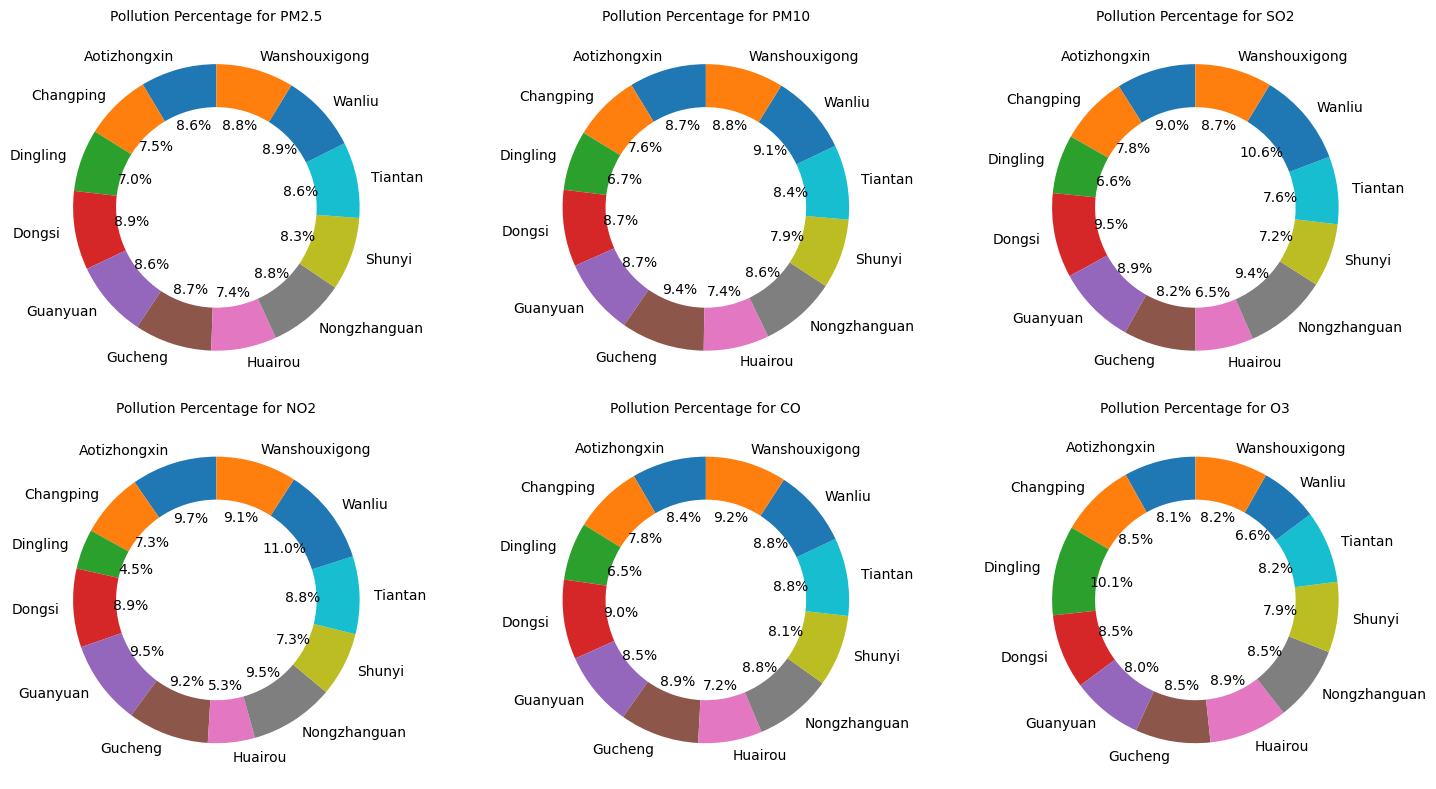

In [24]:
def plot_doughnut_charts(df):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    cities = df['station'].unique()
    num_cities = len(pollutants)
    cols = 3  # Number of columns per row
    rows = (num_cities + cols - 1) // cols  # Calculate number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows), subplot_kw={'aspect': 'equal'})
    axes = axes.flatten()  # Flatten axes for easier indexing

    for i, pollutant in enumerate(pollutants):
        pollutant_data = df[["station", pollutant]]

        # Calculate the sum of each pollutant for the given city
        sizes = [pollutant_data[pollutant_data["station"] == city][pollutant].mean() for city in cities]
        labels = cities  # Labels are the pollutant names

        # Plot doughnut chart for each city
        wedges, texts, autotexts = axes[i].pie(
            sizes,
            labels=labels,
            autopct='%1.1f%%',
            startangle=90,
            wedgeprops=dict(width=0.3),  # Creates the doughnut effect
            textprops=dict(color="black")
        )
        axes[i].set_title(f'Pollution Percentage for {pollutant}', fontsize=10)

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


plot_doughnut_charts(df_with_aqi)

<ipython-input-25-22ccb2762ffc>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pollutant_class_counts = df.groupby(['station', f'class_{pollutant}']).size().unstack(fill_value=0)
<ipython-input-25-22ccb2762ffc>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pollutant_class_counts = df.groupby(['station', f'class_{pollutant}']).size().unstack(fill_value=0)
<ipython-input-25-22ccb2762ffc>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and si

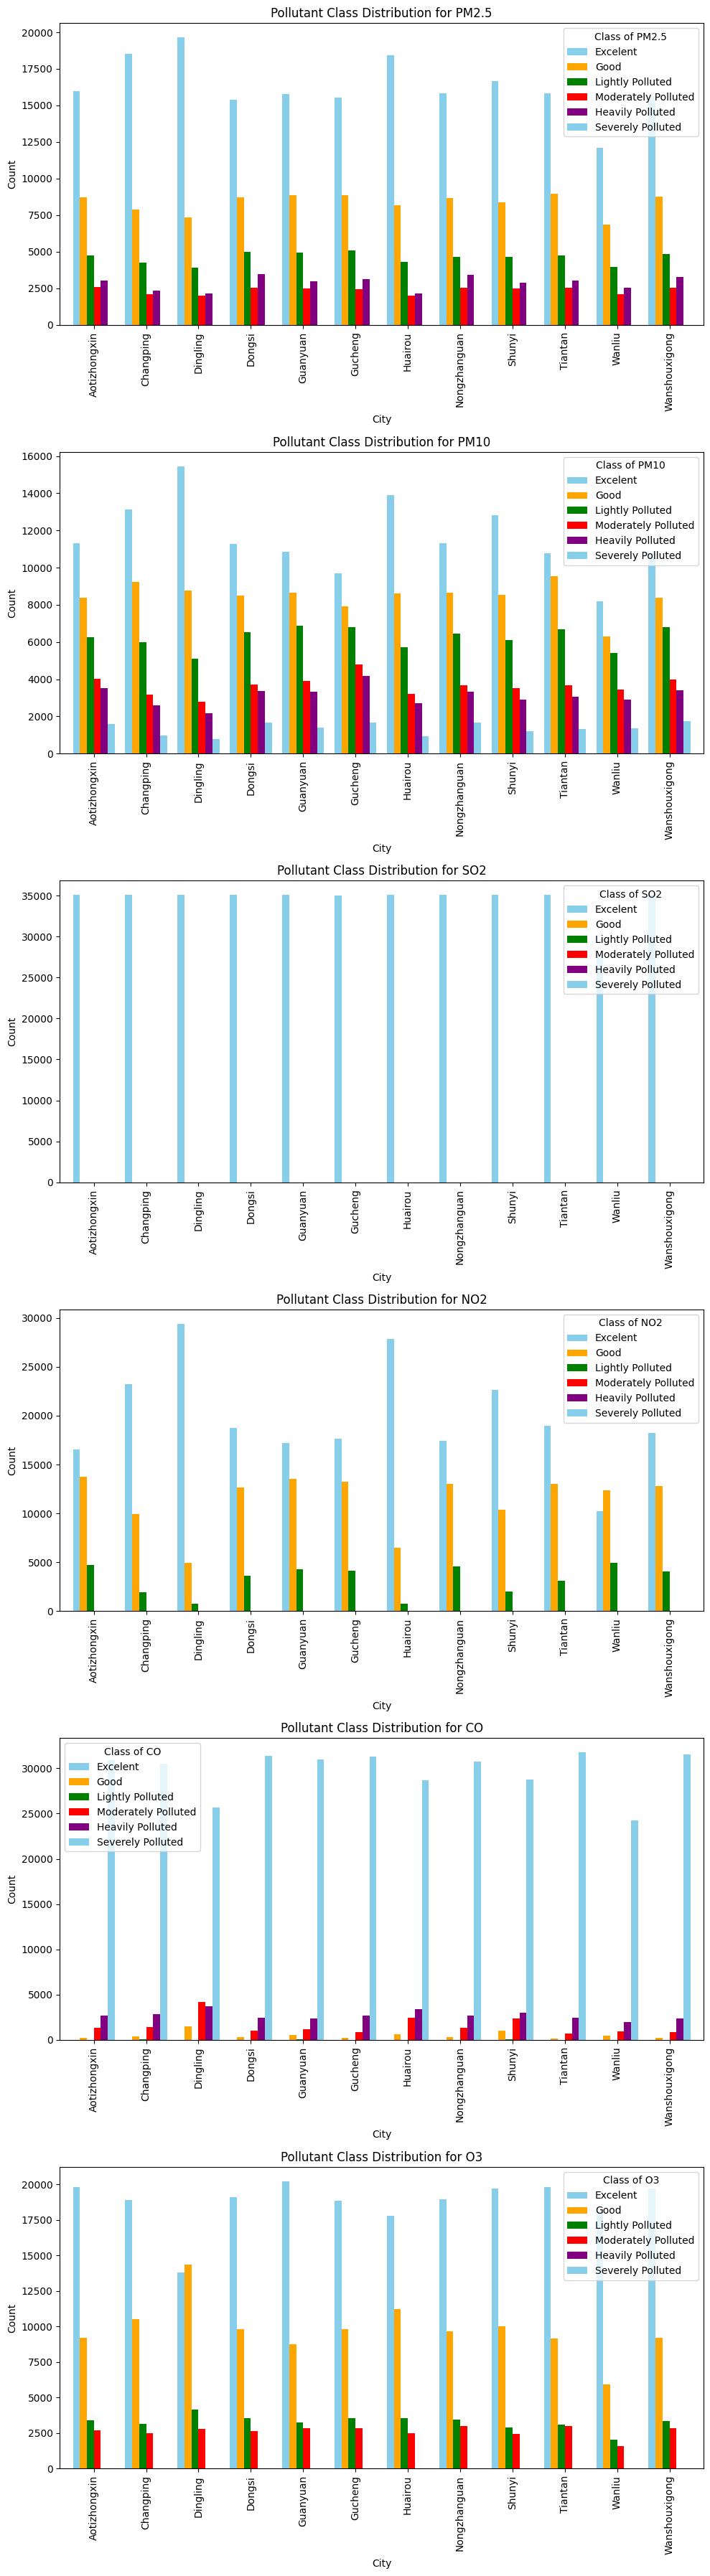

In [25]:
def plot_pollutant_class_counts(df):
    # List of pollutants (assuming you have these columns in your DataFrame)
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    cities = df['station'].unique()

    # Create a figure and axis to hold the bar charts
    fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 6 * len(pollutants)))
    if len(pollutants) == 1:  # If only one row, make axes a list for consistency
        axes = [axes]

    # Loop over each pollutant and create a bar chart for each city
    for i, pollutant in enumerate(pollutants):
        # Group by city and pollutant class, and get the count for each class
        pollutant_class_counts = df.groupby(['station', f'class_{pollutant}']).size().unstack(fill_value=0)

        # Plotting the bar chart
        pollutant_class_counts.plot(kind='bar', stacked=False, ax=axes[i], color=['skyblue', 'orange', 'green', 'red', 'purple'], width=0.8)
        axes[i].set_title(f'Pollutant Class Distribution for {pollutant}')
        axes[i].set_ylabel('Count')
        axes[i].set_xlabel('City')
        axes[i].legend(title=f'Class of {pollutant}')

    plt.tight_layout()
    plt.show()

plot_pollutant_class_counts(df_with_aqi)


**Insight:**
- Seluruh Kota memiliki tingkat polusi yang relatif sama untuk setiap partikel polutan
- Polutan paling berbahaya berdasarkan kelasnya adalah CO, karena mayoritasnya adalah "Severely Polluted". Hal ini menandakan di banyak waktu, gas CO memiliki potensi terbesar menyebabkan penyakit
- Sedangkan polutan paling aman berdasarkan kelasnya adalah SO2, karena mayoritasnya adalah "Good", sehingga masyarakat di semua kota akan lebih aman dari bahaya yang disebabkan oleh gas SO2

### Pertanyaan 2:
Pada saat apa saja konsentrasi partikel polutan (PM2.5, PM10, NO₂, dll.) cenderung mencapai puncaknya, dan bagaimana pola ini di berbagai lokasi ?

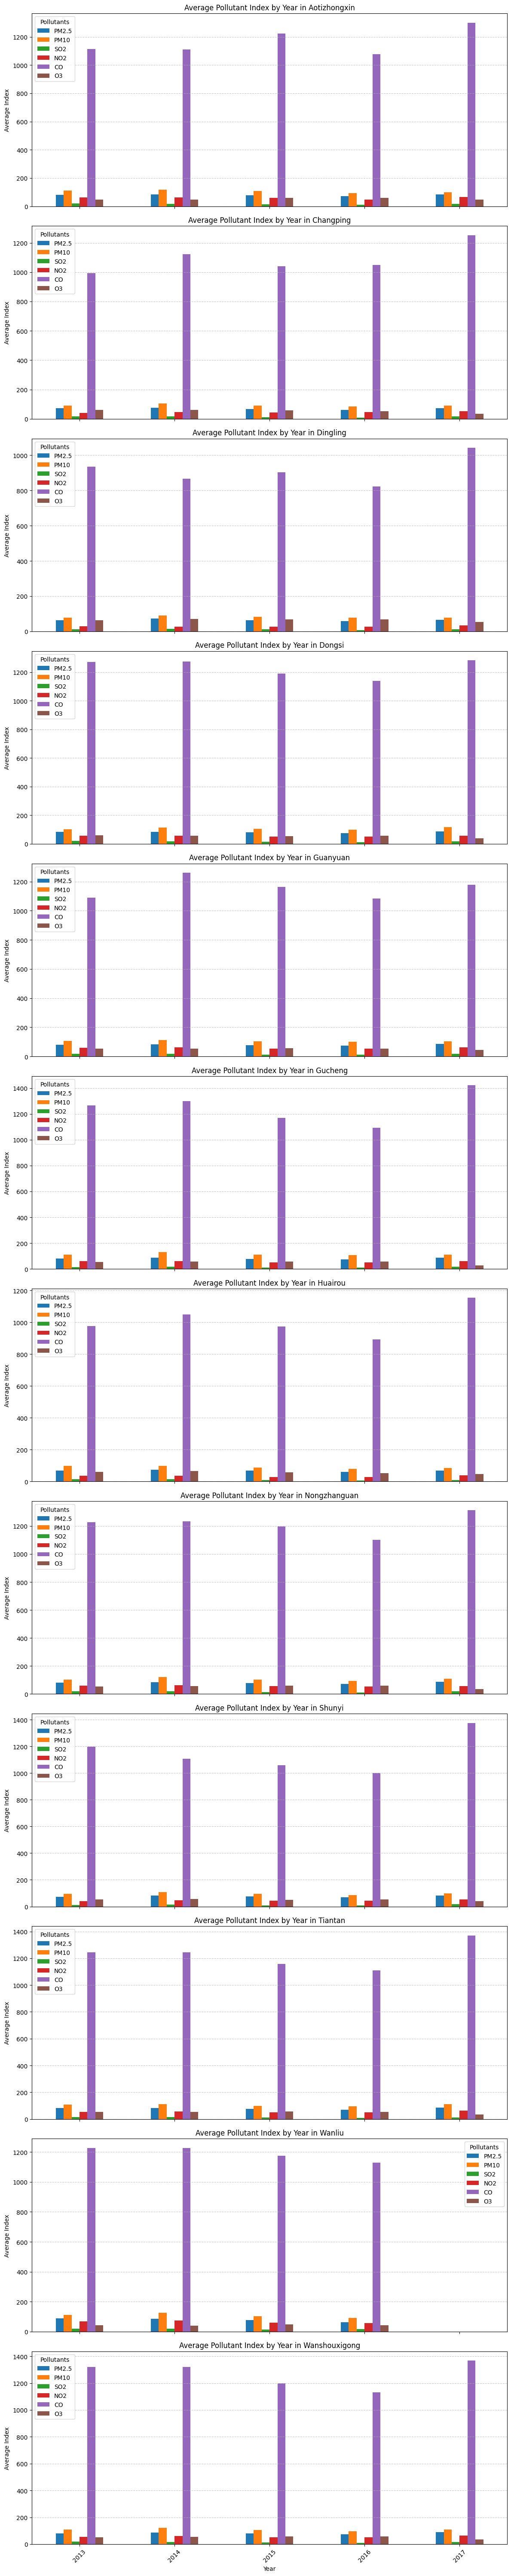

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_pollutant_avg_by_year(df):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    cities = df['station'].unique()

    # Subplots for each city
    fig, axes = plt.subplots(len(cities), 1, figsize=(12, 5 * len(cities)), sharex=True)

    if len(cities) == 1:
        axes = [axes]  # Ensure axes is always iterable

    for i, city in enumerate(cities):
        # Create a copy of the subset data to avoid SettingWithCopyWarning
        city_data = df[df['station'] == city].copy()

        # Extract year from the date column
        city_data['year'] = city_data['date'].dt.year

        # Calculate yearly averages for each pollutant
        yearly_avg = city_data.groupby('year')[pollutants].mean()

        # Plot bar chart for each city
        yearly_avg.plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Average Pollutant Index by Year in {city}')
        axes[i].set_ylabel('Average Index')
        axes[i].legend(title='Pollutants')
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)

        # Set custom ticks for x-axis
        axes[i].set_xticks(range(len(yearly_avg.index)))
        axes[i].set_xticklabels(yearly_avg.index, rotation=45)  # Rotate labels for readability

    plt.xlabel('Year')
    plt.tight_layout()
    plt.show()

plot_pollutant_avg_by_year(df_with_aqi)


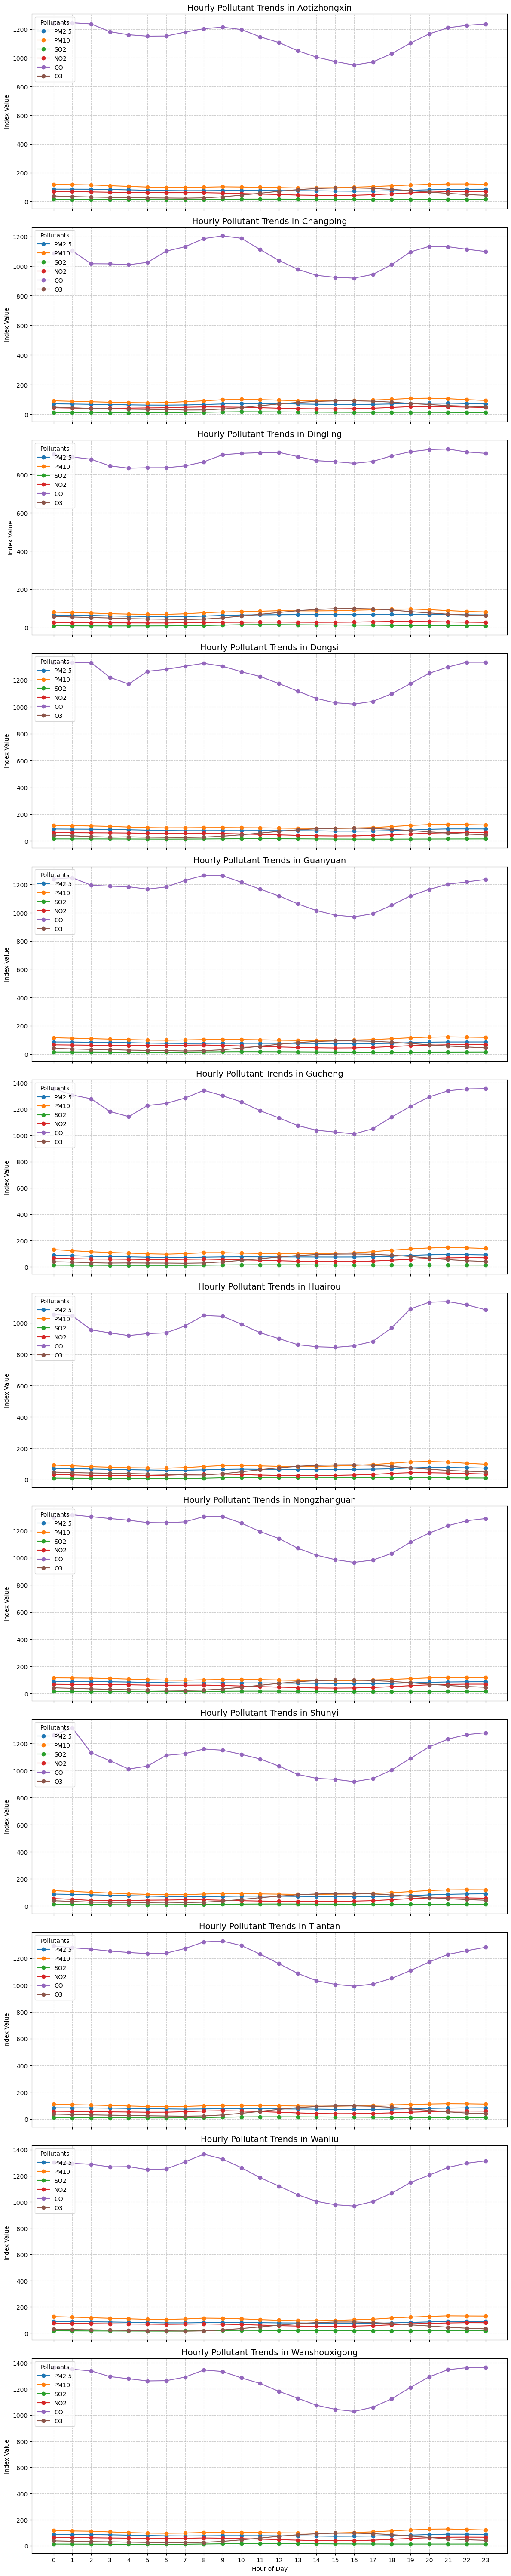

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_pollutant_trends(df):
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    cities = df['station'].unique()

    # Create subplots for each city
    fig, axes = plt.subplots(len(cities), 1, figsize=(12, 5 * len(cities)), sharex=True)

    if len(cities) == 1:
        axes = [axes]  # Ensure axes is always iterable

    for i, city in enumerate(cities):
        # Filter data for the current city
        city_data = df[df['station'] == city].copy()

        # Extract hour from the 'date' column
        city_data['hour'] = city_data['date'].dt.hour

        # Group data by hour and calculate the mean pollutant values
        hourly_means = city_data.groupby('hour')[pollutants].mean()

        # Plot each pollutant as a line chart
        for pollutant in pollutants:
            axes[i].plot(
                hourly_means.index,
                hourly_means[pollutant],
                label=pollutant,
                marker='o',
                linestyle='-'
            )

        # Customize each subplot
        axes[i].set_title(f'Hourly Pollutant Trends in {city}', fontsize=14)
        axes[i].set_ylabel('Index Value')
        axes[i].legend(title='Pollutants', loc='upper left')
        axes[i].grid(True, linestyle='--', alpha=0.6)

    # Set shared X-axis labels
    plt.xlabel('Hour of Day')
    plt.xticks(range(0, 24), labels=range(0, 24))  # Show ticks for 24 hours
    plt.tight_layout()
    plt.show()

# Example usage:
# Ensure the 'date' column in the DataFrame is a datetime object.
# df_with_aqi['date'] = pd.to_datetime(df_with_aqi['date'])
plot_pollutant_trends(df_with_aqi)


**Insight:**
- Dari tahun ke tahun, tingkat polutan gas CO selalu paling tinggi untuk setiap kota dibandingkan dengan partikel polusi lainnya.
- Tingkat polusi gas CO hampir selalu mengalami penurunan di tahun di 2023 dan menjadi tahun dengan tingkat gas CO terendah di setiap kota.
- Di sisi lain, tahun 2024 mengalami peningkatan gas CO dan menjadi tahun dengan tingkat polusi CO tertinggi di semua kota.
- berdasarkan rata-rata per jam tingkat polusi pada masing-masing partikel, terdapat beberapa titik jam yang mempunyai tingkat polusi CO tertinggi dan terendah. Pola yang terbentuk adalah gas CO meningkat di jam pagi (sekitar jam berangkat kerja) dan jam sore (sekitar jam pulang kerja).